In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
PATH = "../dados/brutos/casos_covid19_25julho2020.csv"

# Carregando dados

In [3]:
data_df = pd.read_csv(PATH)
data_df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
# Agrupando pelo último dia da semana epidemiológica
aux_df = data_df[data_df["state"] != "TOTAL"].groupby(["epi_week", "state"]).last()
aux_df.reset_index(inplace=True)

In [5]:
aux_df

,epi_week,state,date,country,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,region
0,9,SP,2020-02-29,Brazil,TOTAL,0,0,0,2,0,2,0.00000,0.00436,0.00000,NaN,NaN,NaN,NaN,Sudeste
1,10,BA,2020-03-07,Brazil,TOTAL,0,0,1,2,0,2,0.00000,0.01345,0.00000,NaN,NaN,NaN,NaN,Nordeste
2,10,DF,2020-03-07,Brazil,TOTAL,0,0,1,1,0,1,0.00000,0.03316,0.00000,NaN,NaN,NaN,NaN,DF
3,10,ES,2020-03-07,Brazil,TOTAL,0,0,0,1,0,1,0.00000,0.02488,0.00000,NaN,NaN,NaN,NaN,Sudeste
4,10,RJ,2020-03-07,Brazil,TOTAL,0,0,0,2,0,2,0.00000,0.01158,0.00000,NaN,NaN,NaN,NaN,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,26,RS,2020-06-25,Brazil,TOTAL,0,500,1051,23060,500,22009,4.39474,202.68538,0.02168,18446.0,2167.0,113189.0,994.87231,Sul
423,26,SC,2020-06-25,Brazil,TOTAL,10,289,1030,21951,279,20921,4.03362,306.37334,0.01317,16377.0,4810.0,75204.0,1049.63329,Sul
424,26,SE,2020-06-25,Brazil,TOTAL,0,524,728,21081,524,20353,22.79553,917.08516,0.02486,7579.0,11886.0,41589.0,1809.24315,Nordeste
425,26,SP,2020-06-25,Brazil,TOTAL,407,13759,9765,248587,13352,238822,29.96360,541.35921,0.05535,49295.0,257900.0,602384.0,1311.83901,Sudeste


In [6]:
estados_df = aux_df.set_index("epi_week").pivot(columns="state")

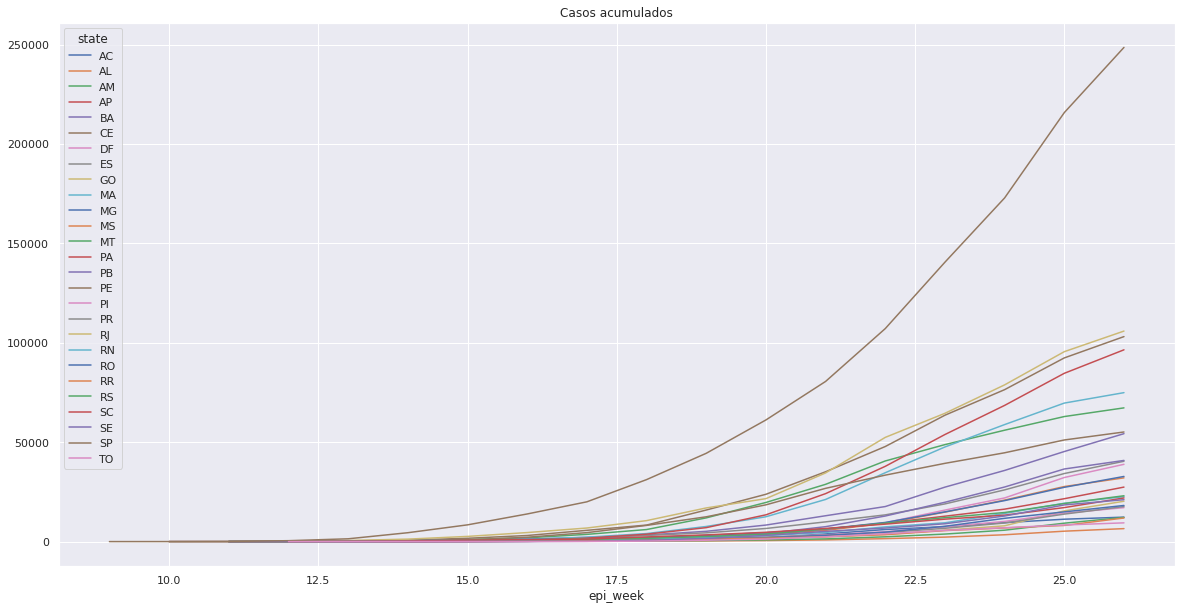

In [7]:
estados_df["totalCases"].plot(title="Casos acumulados")

In [8]:
estados_df.tail().loc[26]["totalCases"].sum()

1232179.0